# 1- Data Wrangling & Cleaning

#### a) import important libraries 
#### b) visualize data shape
#### c) assure data does not contain null values

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
df=pd.read_csv('Cubesat_AboArais_V1.csv')
#df.info()
df.shape , df.isnull().any().any() 


((26553, 20), False)

In [2]:
 # visualiza first 3 rows in the data
 df.head(3)

Timestamp of satellite Date conversion (hide) Date manipulation (hide)  \
0                34:49.1               1/1/1970                 1/1/1970   
1                35:07.8               1/1/1970                 1/1/1970   
2                35:17.1               1/1/1970                 1/1/1970   

  Time conversion (hide) Real time stamp (UTC) OBC_TEMP (C) (hide)  \
0             1:34:49 AM       5/11/2018 12:05         12.80/13.20   
1             1:35:08 AM       5/11/2018 12:05         12.80/13.20   
2             1:35:17 AM       5/11/2018 12:05         12.80/13.20   

   OBC_TEMP_1 (C)   OBC_TEMP_2 (C)  COM_TEMP (Cx10) (hide)  COM_TEMP_1 (C)   \
0             12.8             13.2                123/123             12.3   
1             12.8             13.2                122/123             12.2   
2             12.8             13.2                122/123             12.2   

   COM_TEMP_2 (C)   EPS_TEMP (C)   BATT_VOLT (V)  PV_CURR (mA)  \
0             12.3             11          8.295           200   
1             12.3             11          8.295           200   
2             12.3             11          8.304           200   

   BATT_CURR (mA)  BATT_MODE (3=NORMAL, 4=FULL) PV_VOLT (mV) (hide)  \
0              79                             3      2751/2772/2754   
1              79                             3      2278/2290/2262   
2              79                             4      2741/2737/2754   

   PV_VOLT_1 (V)  PV_VOLT_2 (V)  PV_VOLT_3 (V)  
0          2.751          2.772          2.754  
1          2.278          2.290          2.262  
2          2.741          2.737          2.754

#### d) make data frame of features of interest

In [3]:
# drop not needed columns
df.drop(['Timestamp of satellite','Date conversion (hide)','Date manipulation (hide)','Time conversion (hide)'
,'Time conversion (hide)',
'Real time stamp (UTC)','COM_TEMP (Cx10) (hide)','PV_VOLT (mV) (hide)'
,'OBC_TEMP (C) (hide)'],axis=1,inplace=True
)

In [4]:
#visualize data after dropping
df.head(3)

OBC_TEMP_1 (C)   OBC_TEMP_2 (C)   COM_TEMP_1 (C)   COM_TEMP_2 (C)   \
0             12.8             13.2             12.3             12.3   
1             12.8             13.2             12.2             12.3   
2             12.8             13.2             12.2             12.3   

   EPS_TEMP (C)   BATT_VOLT (V)  PV_CURR (mA)  BATT_CURR (mA)  \
0             11          8.295           200              79   
1             11          8.295           200              79   
2             11          8.304           200              79   

   BATT_MODE (3=NORMAL, 4=FULL)  PV_VOLT_1 (V)  PV_VOLT_2 (V)  PV_VOLT_3 (V)  
0                             3          2.751          2.772          2.754  
1                             3          2.278          2.290          2.262  
2                             4          2.741          2.737          2.754

# 2- Data Preparation

#### a) Do feature scaling to the data by MinMax Scaler

In [5]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df=mms.fit_transform(df);
df=pd.DataFrame(df,columns=['Computer_Temperature_1','Computer_Temperature_2',
'Communication_Temperature_1','Communication_Temperature_2','Electrical_Temperature',
'Battery_Volatge','Photovoltaic_current','Battery_Current','Battery_Mode',
'Photovoltaic_V1','Photovoltaic_V2','Photovoltaic_V3'])
df.head(3)

Computer_Temperature_1  Computer_Temperature_2  \
0                0.162088                0.166213   
1                0.162088                0.166213   
2                0.162088                0.166213   

   Communication_Temperature_1  Communication_Temperature_2  \
0                     0.182609                      0.17971   
1                     0.179710                      0.17971   
2                     0.179710                      0.17971   

   Electrical_Temperature  Battery_Volatge  Photovoltaic_current  \
0                     0.2         0.743243              0.460829   
1                     0.2         0.743243              0.460829   
2                     0.2         0.804054              0.460829   

   Battery_Current  Battery_Mode  Photovoltaic_V1  Photovoltaic_V2  \
0             0.52           0.0         0.497553         0.504617   
1             0.52           0.0         0.401101         0.405705   
2             0.52           1.0         0.495514         0.497435   

   Photovoltaic_V3  
0         0.499387  
1         0.398773  
2         0.499387

#### b) construct 2 data frames, one for tempeature and one for voltage data

In [6]:
df_temp=df.iloc[:,:5]
df_volt=df.iloc[:,5:]

# 3- Data Modeling for anomaly detection

## 3.1 Model the whole data frame 

#### a) Visualize features distributions

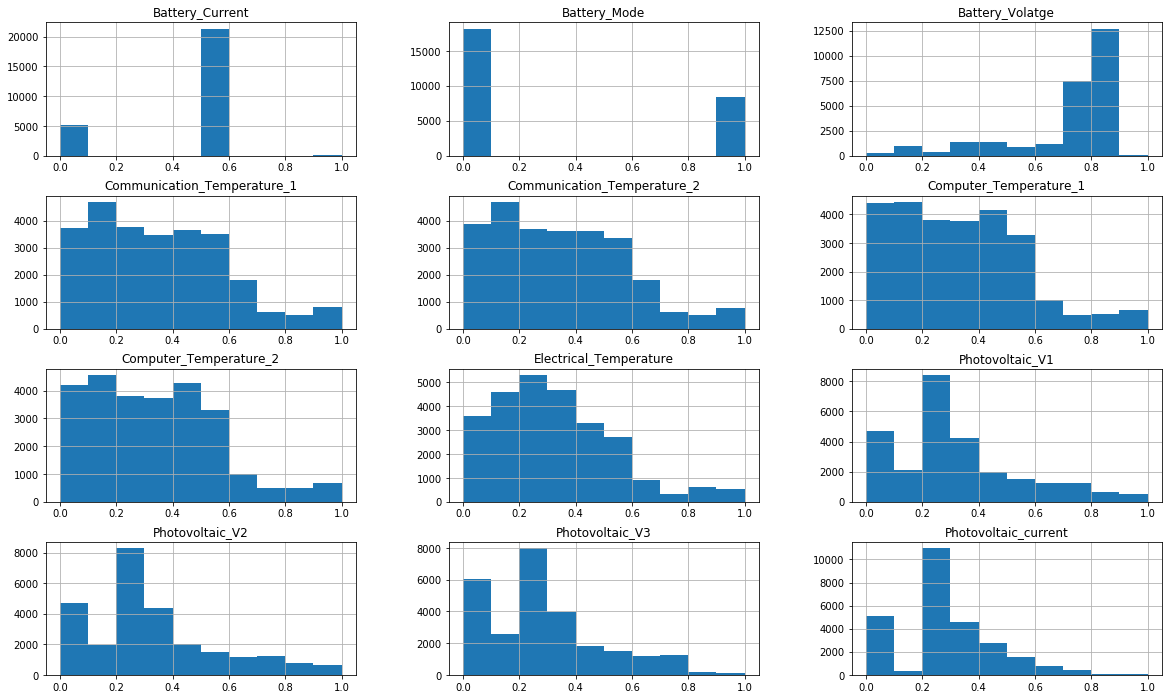

In [7]:
df.hist(figsize=(20,12));

#### b) construct box plot to visualize outliers

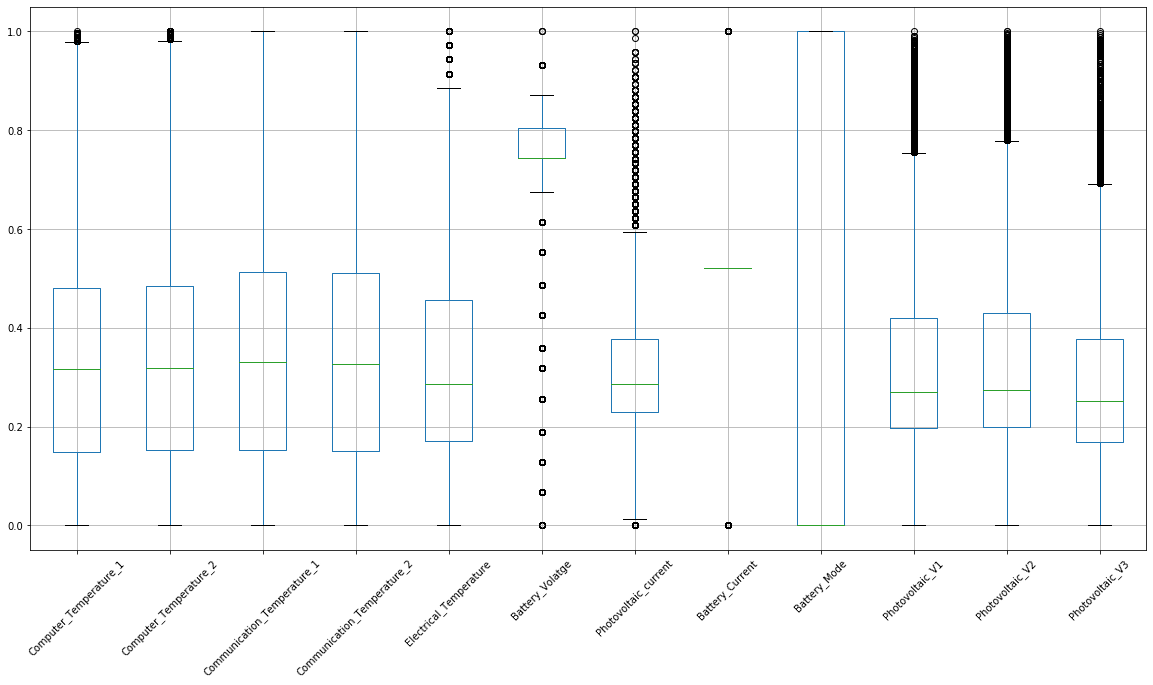

In [8]:
#all data points outer the box is outlier
#seems our data frame has many outliers especially data of voltage
df.boxplot(figsize=(20,10));
plt.xticks(rotation=45);

#### c) fit one class SVM algorithm

In [9]:
# fit and make prediction of the outliers
from sklearn.svm import OneClassSVM
from numpy import where
ocs=OneClassSVM(kernel='rbf',gamma=0.001,nu=0.03);
ocs.fit(df);
y_pred_df_ocs=ocs.predict(df)

In [10]:
# make data frame of outliers where prediction data frame predicts with -1 values
out_ind_df_ocs=np.where(y_pred_df_ocs==-1)
out_df_ocs=df.iloc[out_ind_df_ocs]
# shape of outlier dataframe using SVM
out_df_ocs.shape


(797, 12)

#### d) fit KNN algorithm

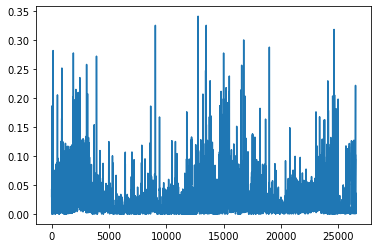

In [11]:
# convert df to array
X_df=df.values
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=3)
nn.fit(X_df);
dist_df_nn,_=nn.kneighbors(X_df)
#plot mean of distances to construct threshold value
plt.plot(dist_df_nn.mean(axis =1));

In [12]:
# we make outlier threshold for above the value of 0.1
out_ind_df_nn=np.where(dist_df_nn.mean(axis=1)>0.15)
out_df_nn=df.iloc[out_ind_df_nn]
# shape of outlier dataframe using KNN
out_df_nn.shape

(95, 12)

#### e) make prediction again with faulty data to assure algorithm effeciency

In [13]:
#proportion of anomalies in svm in all data frame
out_df_ocs.shape[0]/df.shape[0]

0.030015440816480245

In [14]:
#proportion of anomalies in knn
out_df_nn.shape[0]/df.shape[0]

0.003577750160057244

In [15]:
# we check common prediction anomalies rows
#each alg predicts different rows as anomaly
out_df_nn.isin(out_df_ocs).head(3)

Computer_Temperature_1  Computer_Temperature_2  \
31                     True                    True   
120                   False                   False   
124                   False                   False   

     Communication_Temperature_1  Communication_Temperature_2  \
31                          True                         True   
120                        False                        False   
124                        False                        False   

     Electrical_Temperature  Battery_Volatge  Photovoltaic_current  \
31                     True             True                  True   
120                   False            False                 False   
124                   False            False                 False   

     Battery_Current  Battery_Mode  Photovoltaic_V1  Photovoltaic_V2  \
31              True          True             True             True   
120            False         False            False            False   
124            False         False            False            False   

     Photovoltaic_V3  
31              True  
120            False  
124            False

In [16]:
#combine 2 outlier df's and make prediction again
out_df_com=out_df_ocs.append(out_df_nn)
# dimension of combined outlier dataframe
out_df_com.shape

(892, 12)

In [17]:
#SVM
y_pred_df_ocs_com=ocs.predict(out_df_com)
out_ind_df_ocs_com=where(y_pred_df_ocs_com==-1)
out_df_ocs_com=out_df_com.iloc[out_ind_df_ocs_com]


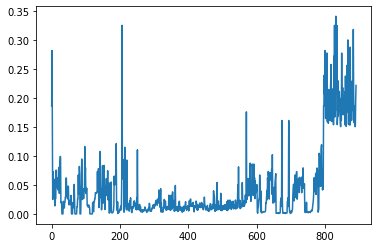

In [18]:
#KNN
XX_df=out_df_com.values
dist_df_nn_com,_=nn.kneighbors(XX_df)
plt.plot(dist_df_nn_com.mean(axis =1));

In [19]:
out_ind_df_nn_com=np.where(dist_df_nn_com.mean(axis=1)>0.15)
out_df_nn_com=out_df_com.iloc[out_ind_df_nn_com]
out_df_nn_com.shape

(102, 12)

In [20]:
#proportion on anomalies
out_df_ocs_com.shape[0]/out_df_com.shape[0]

0.9013452914798207

In [21]:
out_df_nn_com.shape[0]/out_df_com.shape[0]

0.11434977578475336

Here is SVM indicates 90% of anomaly data is an anomaly
while KNN indicates only 11% of them as an anomaly
hence , oneclass SVM is BETTER

## 3.2 Temperature data

#### a) fit SVM

In [22]:
ocs1=OneClassSVM(kernel='rbf',gamma=0.001,nu=0.03);
ocs1.fit(df_temp);
y_pred_df_temp_ocs=ocs1.predict(df_temp)
out_ind_df_temp_ocs=np.where(y_pred_df_temp_ocs==-1)
out_df_temp_ocs=df_temp.iloc[out_ind_df_temp_ocs]
#outlier dimensionality from SVM
out_df_temp_ocs.shape

(800, 5)

#### b) fit KNN

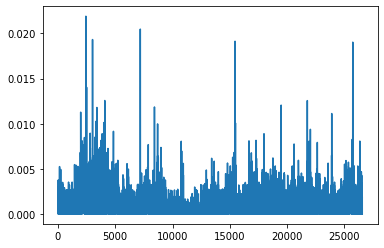

In [23]:
X_df_temp=df_temp.values
nn1=NearestNeighbors(n_neighbors=3)
nn1.fit(X_df_temp);
dist_df_temp_nn,_=nn1.kneighbors(X_df_temp)
plt.plot(dist_df_temp_nn.mean(axis =1));


In [24]:
# we make threshold of 0.005
out_ind_df_temp_nn=np.where(dist_df_temp_nn.mean(axis=1)>0.005)
out_df_temp_nn=df_temp.iloc[out_ind_df_temp_nn]
#outlier dimensionality from SVM
out_df_temp_nn.shape

(177, 5)

#### c) make prediction again with faulty data to assure algorithm effeciency

In [25]:
#proportion of anomalies in svm
out_df_temp_ocs.shape[0]/df_temp.shape[0]

0.030128422400482056

In [26]:
#proportion of anomalies in knn
out_df_temp_nn.shape[0]/df_temp.shape[0]

0.006665913456106655

In [27]:
#combine 2 outlier dataframes
out_df_temp_com=out_df_temp_ocs.append(out_df_temp_nn)
out_df_temp_com.shape

(977, 5)

In [28]:
#1- fit with svm
y_pred_df_temp_ocs_com=ocs1.predict(out_df_temp_com)
out_ind_df_temp_ocs_com=where(y_pred_df_temp_ocs_com==-1)
out_df_temp_ocs_com=out_df_temp_com.iloc[out_ind_df_temp_ocs_com]
out_df_temp_ocs_com.shape

(807, 5)

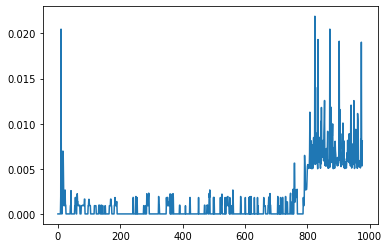

In [29]:
#KNN
XX_df_temp=out_df_temp_com.values
dist_df_temp_nn_com,_=nn1.kneighbors(XX_df_temp)
plt.plot(dist_df_temp_nn_com.mean(axis =1));


In [30]:
# change threshold to 0.01
out_ind_df_temp_nn_com=np.where(dist_df_temp_nn_com.mean(axis=1)>0.01)
out_df_temp_nn_com=out_df_temp_com.iloc[out_ind_df_temp_nn_com]
out_df_temp_nn_com.shape


(21, 5)

In [31]:
# proportion of anomalies of ocs to anomalies data
out_df_temp_ocs_com.shape[0]/out_df_temp_com.shape[0]

0.8259979529170931

In [32]:
# proportion of KNN
out_df_temp_nn_com.shape[0]/out_df_temp_com.shape[0]

0.021494370522006142

Knn after assigning data of anomalies to it , it keeps predicting lower anomalies of 20% of data while SVM has predicted a 83% data as an anomaly

## 3.3 Voltage Data
in boxploting above , it shows that the voltage data has the majority of outliers

#### a) fit SVM

In [33]:
#svm
ocs2=OneClassSVM(kernel='rbf',gamma=0.001,nu=0.03);
ocs2.fit(df_volt);
y_pred_df_volt_ocs=ocs2.predict(df_volt)
out_ind_df_volt_ocs=np.where(y_pred_df_volt_ocs==-1)
out_df_volt_ocs=df_volt.iloc[out_ind_df_volt_ocs]
# outliers dimensioanlty
out_df_volt_ocs.shape

(859, 7)

#### b) fit KNN

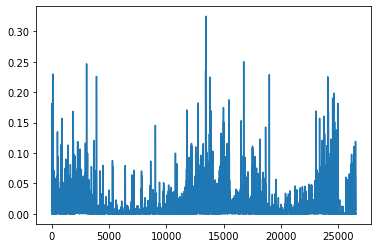

In [34]:
#KNN
X_df_volt=df_volt.values
nn2=NearestNeighbors(n_neighbors=3)
nn2.fit(X_df_volt);
dist_df_volt_nn,_=nn2.kneighbors(X_df_volt)
plt.plot(dist_df_volt_nn.mean(axis =1));

In [35]:
out_ind_df_volt_nn=np.where(dist_df_volt_nn.mean(axis=1)>0.1)
out_df_volt_nn=df_volt.iloc[out_ind_df_volt_nn]
out_df_volt_nn.shape

(118, 7)

#### c) make prediction again with faulty data to assure algorithm effeciency


In [36]:
#proportion of anomalies in svm
out_df_volt_ocs.shape[0]/df_volt.shape[0]

0.032350393552517606

In [37]:

#proportion of anomalies in knn
out_df_volt_nn.shape[0]/df_volt.shape[0]

0.004443942304071103

In [38]:
#combine 2 outlier dataframes
out_df_volt_com=out_df_volt_ocs.append(out_df_volt_nn)
out_df_volt_com.shape

(977, 7)

In [39]:
#1- fit with svm
y_pred_df_volt_ocs_com=ocs2.predict(out_df_volt_com)
out_ind_df_volt_ocs_com=where(y_pred_df_volt_ocs_com==-1)
out_df_volt_ocs_com=out_df_volt_com.iloc[out_ind_df_volt_ocs_com]
out_df_volt_ocs_com.shape

(871, 7)

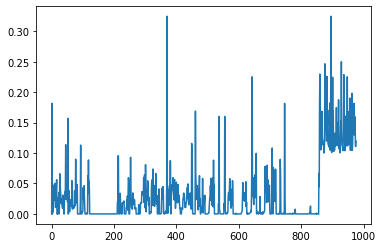

In [40]:
#KNN
XX_df_volt=out_df_volt_com.values
dist_df_volt_nn_com,_=nn2.kneighbors(XX_df_volt)
plt.plot(dist_df_volt_nn_com.mean(axis =1));

In [41]:
out_ind_df_volt_nn_com=np.where(dist_df_volt_nn_com.mean(axis=1)>0.1)
out_df_volt_nn_com=out_df_volt_com.iloc[out_ind_df_volt_nn_com]
out_df_volt_nn_com.shape


(130, 7)

In [42]:
out_df_volt_ocs_com.shape[0]/out_df_volt_com.shape[0]

0.8915046059365405

In [43]:
out_df_volt_nn_com.shape[0]/out_df_volt_com.shape[0]

0.1330603889457523

Knn after assigning data of anomalies to it , it keeps predicting lower anomalies of 13% of data while SVM has predicted a 89% data as an anomaly